In [1]:
import cv2
import time
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence = 0.3, model_complexity = 2)

mp_drawing = mp.solutions.drawing_utils

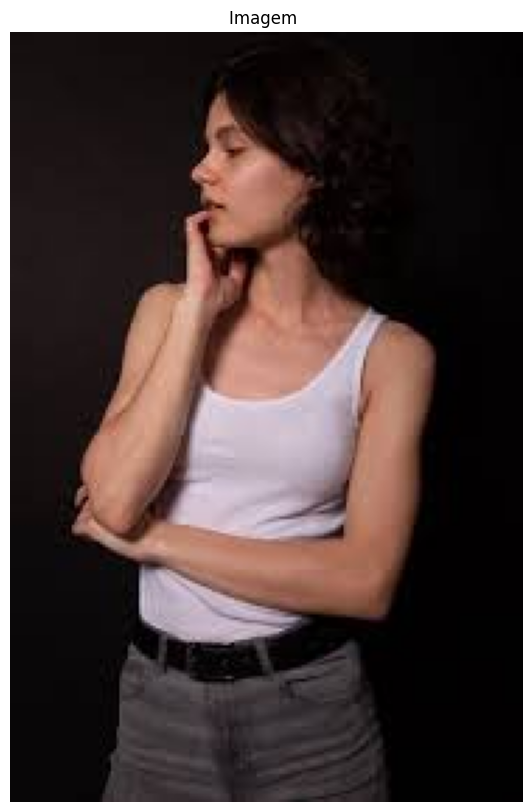

In [ ]:
imagem = cv2.imread('simple.jpg')
plt.figure(figsize = [10,10])
plt.title("Imagem Teste");plt.axis('off');plt.imshow(imagem[:,:,::-1]);plt.show()

In [24]:
results = pose.process(cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
    for i in range(32):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.382004648
y: 0.18672514
z: -0.874498904
visibility: 0.997801483

LEFT_EYE_INNER:
x: 0.420199
y: 0.159180343
z: -0.898287058
visibility: 0.995174825

LEFT_EYE:
x: 0.435258031
y: 0.161042154
z: -0.899686
visibility: 0.996480167

LEFT_EYE_OUTER:
x: 0.454667151
y: 0.16306895
z: -0.899868429
visibility: 0.996269703

RIGHT_EYE_INNER:
x: 0.404350042
y: 0.154649258
z: -0.82218051
visibility: 0.996729612

RIGHT_EYE:
x: 0.405218899
y: 0.153047383
z: -0.823550701
visibility: 0.998398602

RIGHT_EYE_OUTER:
x: 0.406152606
y: 0.150920153
z: -0.824872375
visibility: 0.998327315

LEFT_EAR:
x: 0.544241309
y: 0.185259461
z: -0.831607
visibility: 0.999271095

RIGHT_EAR:
x: 0.459597528
y: 0.169524193
z: -0.486282527
visibility: 0.998343229

MOUTH_LEFT:
x: 0.410005748
y: 0.225193083
z: -0.829286337
visibility: 0.998915672

MOUTH_RIGHT:
x: 0.385835022
y: 0.220059454
z: -0.735946
visibility: 0.99856168

LEFT_SHOULDER:
x: 0.755606592
y: 0.416901588
z: -0.681639194
visibility: 0.999829531

RIGHT_SHOU

In [28]:
altura,largura,_ = imagem.shape

if results.pose_landmarks:
    for i in range(5):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * largura}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * altura}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * largura}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 69.90685066580772
y: 51.34941339492798
z: -160.0332993865013
visibility: 0.9978014826774597

LEFT_EYE_INNER:
x: 76.89641824364662
y: 43.774594366550446
z: -164.3865315914154
visibility: 0.9951748251914978

LEFT_EYE:
x: 79.65221965312958
y: 44.28659230470657
z: -164.64253413677216
visibility: 0.9964801669120789

LEFT_EYE_OUTER:
x: 83.20408862829208
y: 44.84396129846573
z: -164.67592245340347
visibility: 0.996269702911377

RIGHT_EYE_INNER:
x: 73.99605774879456
y: 42.52854585647583
z: -150.45903325080872
visibility: 0.9967296123504639



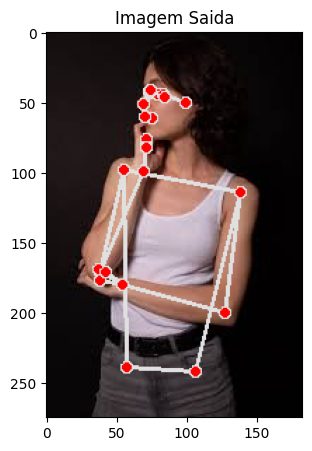

In [36]:
imagem_copia = imagem.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image = imagem_copia,landmark_list = results.pose_landmarks,connections= mp_pose.POSE_CONNECTIONS)
    figura = plt.figure(figsize = [5,5])
    plt.title("Imagem Saida");plt.imshow(imagem_copia[:,:,::-1]);plt.show()

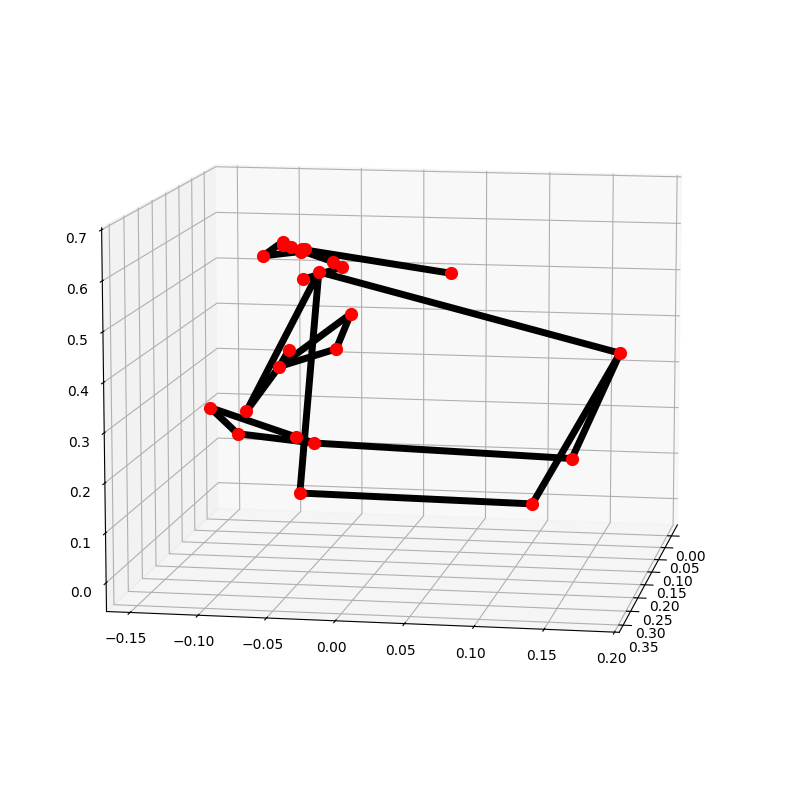

In [37]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [1]:
import cv2
import time
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence = 0.3, model_complexity = 2)

mp_drawing = mp.solutions.drawing_utils

In [ ]:
def detectPose(image, pose, display = True):
    # output_image = image.copy()

    output_image = np.zeros_like(image)
    landmarks = []

    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(imageRGB)

    altura, largura, _ = imageRGB.shape

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image = output_image, landmark_list = results.pose_landmarks,
                                  connections = mp_pose.POSE_CONNECTIONS)
        

        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * largura), int( landmark.y * altura),(landmark.x * largura)))
    
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Imagem original");plt.axis('off')
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Saída");plt.axis('off')

        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    else:
        return output_image, landmarks

In [ ]:
pose_video = mp_pose.Pose(static_image_mode = False, min_detection_confidence= 0.5,model_complexity = 2)
video = cv2.VideoCapture('videoplayback.mp4')
cv2.namedWindow('Detecção da Pose',cv2.WINDOW_NORMAL)
cv2.namedWindow('Pessoa',cv2.WINDOW_NORMAL)

video.set(3,640)
video.set(4,480)


while video.isOpened():
    ok, frame = video.read()
    if not ok:
        break

    frame = cv2.flip(frame,1)
    frame_altura, frame_largura,_ = frame.shape
    frame = cv2.resize(frame,(int(frame_largura * (640 / frame_altura)), 640))
     
    frame2 = frame.copy()
    frame, _ = detectPose(frame, pose_video, display=False)
    
        
    cv2.imshow('Detecção da Pose',frame)
    cv2.imshow('Pessoa',frame2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()

cv2.destroyAllWindows()
                    


In [4]:
import cv2
import mediapipe as mp
import threading
import numpy as np

# Inicializar MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)
pose_video2 = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Carregar vídeos
video_camera = cv2.VideoCapture(0)
video_file = cv2.VideoCapture('videoplayback.mp4')

# Inicializar frames
frame_cam = None
frame_file = None
output_cam = None
output_file = None

# Função para processar a pose
def detectPose(image, pose):
    output_image = np.zeros_like(image)
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
    return output_image

# Função para capturar e processar o frame da câmera
def process_camera():
    global frame_cam, output_cam
    while video_camera.isOpened():
        ok, frame = video_camera.read()
        if not ok:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (640, 480))
        frame_cam = frame
        output_cam = detectPose(frame, pose_video)

# Função para capturar e processar o frame do vídeo
def process_video():
    global frame_file, output_file
    while video_file.isOpened():
        ok2, frame2 = video_file.read()
        if not ok2:
            break
        frame2 = cv2.resize(frame2, (640, 480))
        frame_file = frame2
        output_file = detectPose(frame2, pose_video2)

# Iniciar threads
thread_cam = threading.Thread(target=process_camera)
thread_video = threading.Thread(target=process_video)

thread_cam.start()
thread_video.start()

# Loop para exibir as janelas
cv2.namedWindow('Video Original', cv2.WINDOW_NORMAL)
cv2.namedWindow('Meu Esqueleto', cv2.WINDOW_NORMAL)
cv2.namedWindow('Esqueleto do Video', cv2.WINDOW_NORMAL)

while True:
    # Mostrar os frames processados
    if frame_cam is not None and output_cam is not None:
        cv2.imshow('Meu Esqueleto', output_cam)
    if frame_file is not None and output_file is not None:
        cv2.imshow('Esqueleto do Video', output_file)       
        cv2.imshow('Video Original', frame_file)




    # Pressionar 'q' para sair
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
video_camera.release()
video_file.release()
cv2.destroyAllWindows()

# Esperar as threads terminarem
thread_cam.join()
thread_video.join()
